## 패키지 설치

본 실습에 대한 진행을 위해서는 `numpy`, `pandas`, `matplotlib`외에도

**주가 데이터 로드** 및 **주식 캔들차트 시각화**를 위하여

`finance-datareader` 와 `mpl_finance` 라이브러리 설치가 필요합니다.

**패키지 정보**

- [FinanceDataReder](https://github.com/FinanceData/FinanceDataReader): 주가 정보 로드
- [mpl-finance](https://github.com/matplotlib/mpl-finance): candle 차트 시각화

In [ ]:
# finance-datareader 설치
!pip install finance-datareader

# mpl-finance
!pip install mpl-finance

## 모듈 import 

In [114]:
import numpy as np
import pandas as pd

import FinanceDataReader as fdr
from mpl_finance import candlestick_ohlc

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# 차트의 기본 캔버스 크기 설정
plt.rcParams["figure.figsize"] = (10, 8)
# 차트의 기본 라인 굵기 설정
plt.rcParams['lines.linewidth'] = 1.5
# 차트의 기본 라인 컬러 설정
plt.rcParams['lines.color'] = 'tomato'

`finance-datareader`로부터 **코스피(Kospi)** 정보 불러오기

In [59]:
data = fdr.DataReader('KS11')
data

,Close,Open,High,Low,Volume,Change
Date,,,,,,
1981-05-01,123.60,123.60,123.60,123.60,3330000.0,0.0098
1981-05-02,123.50,123.50,123.50,123.50,2040000.0,-0.0008
1981-05-04,120.60,120.60,120.60,120.60,1930000.0,-0.0235
1981-05-06,120.70,120.70,120.70,120.70,1690000.0,0.0008
1981-05-07,119.30,119.30,119.30,119.30,1480000.0,-0.0116
...,...,...,...,...,...,...
2021-10-25,3020.54,3001.10,3025.27,2983.29,791800000.0,0.0048
2021-10-26,3049.08,3039.82,3051.65,3030.53,564560000.0,0.0094
2021-10-27,3025.49,3045.83,3049.02,3019.00,607880000.0,-0.0077


`finance-datareader`로부터 **주가 종목 코드로** 주가정보 불러오기

In [60]:
# 카카오(035720) 종목코드 입력
data = fdr.DataReader('035720')
data

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1999-11-11,999,999,999,999,12,NaN
1999-11-12,1115,1115,1115,1115,140,0.116116
1999-11-15,1249,1249,1249,1249,405,0.120179
1999-11-16,1396,1396,1396,1396,214,0.117694
1999-11-17,1561,1561,1561,1561,191,0.118195
...,...,...,...,...,...,...
2021-10-25,126500,127500,123500,126000,2309608,-0.011765
2021-10-26,126000,128000,126000,127500,1265299,0.011905
2021-10-27,128000,129000,126500,128500,1449071,0.007843


## 주가 차트와 거래량 정보 시각화

시작일(startdate), 종료일(enddate)를 정의합니다.

In [153]:
startdate = '2021-09-01'
enddate = '2021-09-20'

`startdate`와 `enddate`사이에 있는 데이터만 추출합니다.

In [154]:
# 주가 정보의 시작: 종료 추출
data_ = data.loc[startdate:enddate]
data_

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-09-01,155000,156000,154000,154000,2011434,-0.006452
2021-09-02,154500,156000,153500,155000,1649156,0.006494
2021-09-03,155500,157500,154500,156500,1934669,0.009677
2021-09-06,156000,156500,152500,155500,1883428,-0.006390
2021-09-07,155500,156000,153500,154000,1072249,-0.009646
2021-09-08,151500,151500,136500,138500,16920382,-0.100649
2021-09-09,134000,134500,128000,128500,14534253,-0.072202
2021-09-10,127000,133500,126000,130000,9918050,0.011673
2021-09-13,126500,130000,122500,124500,8675498,-0.042308


**주식 차트 생성**

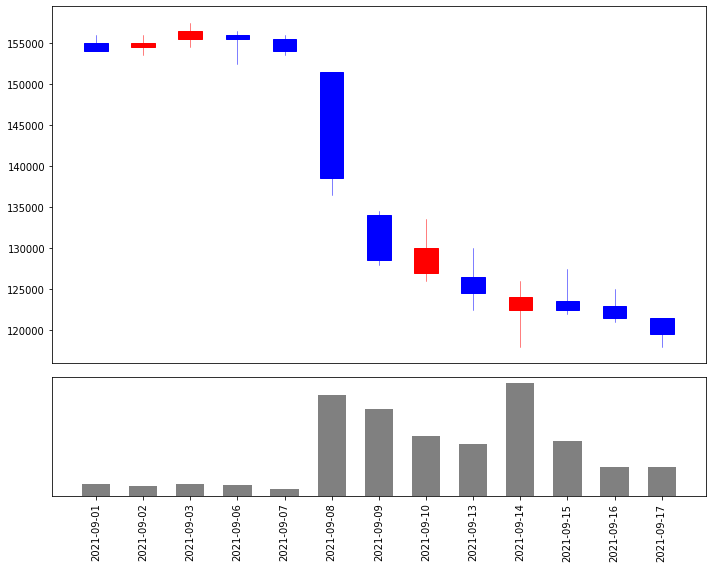

In [155]:
fig = plt.figure()
fig.set_facecolor('w')
# 2개의 캔버스 생성 후 1번째는 차트를 2번째는 거래량
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1])

axes = []
axes.append(plt.subplot(gs[0]))
axes.append(plt.subplot(gs[1], sharex=axes[0]))
axes[0].get_xaxis().set_visible(False)

x = np.arange(len(data_.index))
ohlc = data_[['Open', 'High', 'Low', 'Close']].values
dohlc = np.hstack((np.reshape(x, (-1, 1)), ohlc))

# 봉차트
candlestick_ohlc(axes[0], dohlc, width=0.5, colorup='r', colordown='b')

# 거래량 차트
axes[1].bar(x, data_['Volume'], color='grey', width=0.6, align='center')
axes[1].set_xticks(range(len(x)))
axes[1].set_xticklabels(list(data_.index.strftime('%Y-%m-%d')), rotation=90)
axes[1].get_yaxis().set_visible(False)

plt.tight_layout()

## 종가 데이터만 추출 후 정규화(Normalization)

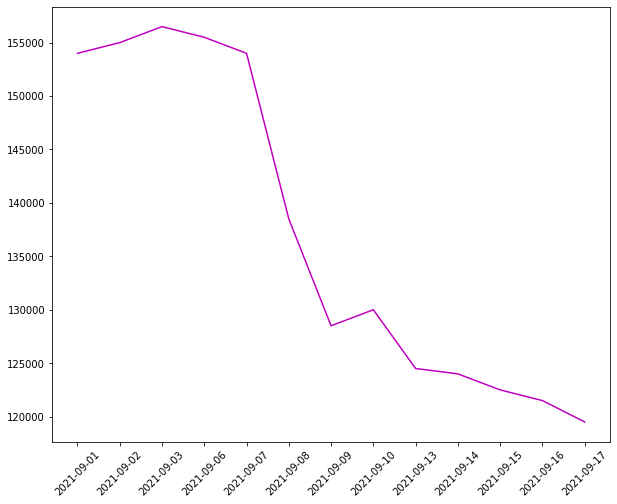

In [178]:
# 종가(Close)만 추출
close = data_['Close']

# 추출한 종가(Close) 데이터를 lineplot
# .plot(color='tomato')
plt.plot(data_['Close'].values, color='m')
plt.xticks(np.arange(len(data_['Close'])), data_['Close'].index.strftime('%Y-%m-%d'), rotation=45)
plt.show()

기준(`startdate:enddate`)이 되는 종가 데이터에 대하여 정규화(Normalization)을 진행합니다.

정규화를 하여 기간에 대한 같은 가격 데이터의 스케일을 가질 수 있도록 해야하는데, 이렇게 정규화를 해야 패턴 찾을 때 주가의 **오르내림** 패턴을 인지할 수 있습니다.

정규화를 적용한 뒤 기준 값이라는 의미의 `base` 변수에 대입합니다.

In [157]:
# 종가(Close)에 대한 정규화
base = (close - close.min()) / (close.max() - close.min())
base

Date
2021-09-01    0.932432
2021-09-02    0.959459
2021-09-03    1.000000
2021-09-06    0.972973
2021-09-07    0.932432
2021-09-08    0.513514
2021-09-09    0.243243
2021-09-10    0.283784
2021-09-13    0.135135
2021-09-14    0.121622
2021-09-15    0.081081
2021-09-16    0.054054
2021-09-17    0.000000
Name: Close, dtype: float64

## 윈도우 범위(window_size) 만큼의 유사 패턴 찾기 (cosine 유사도)

먼저, 윈도우 사이즈는 `base` 변수에 담긴 기준 데이터의 개수로 지정합니다.

In [158]:
# 윈도우 사이즈
window_size = len(base)

예측 기간은 향후 **N일간**의 주간을 예측하도록 합니다.

사실 예측이라기 보다는 과거 데이터에서 찾은 **코사인 유사도가 가장 높았던 패턴의 향후 5일 주가 추이**를 그대로 가져와서 보여주는 것입니다.

In [159]:
# 예측 기간
next_date = 5

반목문 횟수를 계산합니다.

**처음부터 윈도우 사이즈만큼 이동하면서 끝까지 탐색**합니다.

모든 탐색에 대해서는 **코사인 유사도를 계산하여 index로 저장**합니다.

In [160]:
# 검색 횟수
moving_cnt = len(data) - window_size - next_date - 1

코사인 유사도를 구하는 공식을 활용하여 **다음과 같이 함수로 구현**합니다.

혹은 **scipy**에서 제공하는 `cosine`을 사용하여 구할 수도 있습니다.

[scipy.spatial.distance.cosine](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cosine.html)

In [162]:
def cosine_similarity(x, y):
    return np.dot(x, y) / (np.sqrt(np.dot(x, x)) * np.sqrt(np.dot(y, y)))

다음은 데이터의 처음부터 끝까지 `window_size`만큼 순회하면서 `base`와의 코사인 유사도를 모두 계산하여 `sim_list` 리스트에 추가합니다.

나중에 `sim_list`에서 코사인 유사도를 기준으로 내림차순 정렬을 하여 유사도가 높은 인덱스를 확인하겠습니다

In [163]:
# 코사인 유사도를 계산하여 저장해줄 리스트를 생성합니다
sim_list = []

for i in range(moving_cnt):
    # i 번째 인덱스 부터 i+window_size 만큼의 범위를 가져와 target 변수에 대입합니다
    target = data['Close'].iloc[i:i+window_size]
    
    # base와 마찬가지로 정규화를 적용하여 스케일을 맞춰 줍니다
    target = (target - target.min()) / (target.max() - target.min())
    
    # 코사인 유사도를 계산합니다
    cos_similarity = cosine_similarity(base, target)
    
    # 계산된 코사인 유사도를 추가합니다
    sim_list.append(cos_similarity)

## 유사도 계산 결과 확인

계산된 코사인 유사도는 `sim_list`에 저장되어 있으며, 이를 내림차순 정렬하여 상위 20개를 출력하면 다음과 같습니다

In [164]:
pd.Series(sim_list).sort_values(ascending=False).head(20)

5384    1.000000
3276    0.994382
1801    0.989912
1026    0.989041
3196    0.986168
1989    0.985774
4011    0.985743
4538    0.985353
3210    0.985147
4659    0.985074
3528    0.984875
3211    0.984738
592     0.984496
995     0.984276
2952    0.984207
3078    0.984094
2065    0.983622
996     0.982743
3557    0.982710
2154    0.982579
dtype: float64

**5384** 인덱스는 자기 자신 인덱스이므로 코사인 유사도가 1이 나왔습니다.

그다음으로 유사도가 높게 나온 **3276** 인덱스의 주가와 `base` 주가를 **동시에 시각화하여 향후 주가를 예측**해 봅니다.

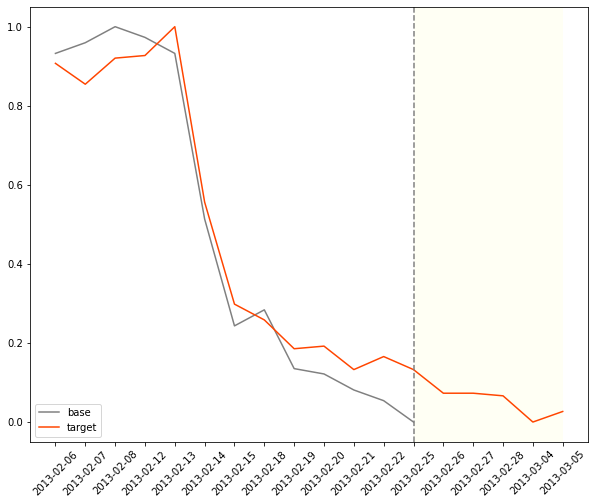

In [199]:
# 높은 유사도를 기록한 인덱스 대입
idx=3276

# target 변수에 종가 데이터의 [기준 인덱스] 부터 [기준 인덱스 + window_size + 예측(5일)] 데이터를 추출합니다
target = data['Close'].iloc[idx:idx+window_size+5]

# 정규화를 적용합니다
target = (target - target.min()) / (target.max() - target.min())

# 결과를 시각화합니다
plt.plot(base.values, label='base', color='grey')
plt.plot(target.values, label='target', color='orangered')
plt.xticks(np.arange(len(target)), list(target.index.strftime('%Y-%m-%d')), rotation=45)
plt.axvline(x=len(base)-1, c='grey', linestyle='--')
plt.axvspan(len(base.values)-1, len(target.values)-1, facecolor='ivory', alpha=0.7)
plt.legend()
plt.show()

**결과 정리**

1. **2013년 2월 6일**부터 **2013년 2월 23일**까지의 데이터가 **가장 유사도가 높게** 나왔음을 확인할 수 있습니다.
2. 코사인 유사도는 **0.994382**를 기록하였습니다.
3. 과거 패턴에서는 향후 주가가 횡보 혹은 추가 하락이 있었습니다.